In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

plt.style.use('seaborn')

In [2]:
D = 10
T = 2
r = 0.04
sigma = 0.2
V0 = 12.5

In [3]:
rho_list = np.array([i for i in np.arange(0.05 ,1.05, 0.05)])

In [4]:
K1_list = D * np.exp(-r*T) * rho_list

In [5]:
def get_survivalP(V0, D, r, sigma, T, K1):
    d2 = (np.log(V0 / D) + (r - sigma ** 2 / 2) * T) / (sigma * T ** 0.5)
    d3 = (np.log(K1 ** 2 / (V0 * D)) + (r - sigma ** 2 / 2) * T) / (sigma * T ** 0.5)
    Nd2 = norm.cdf(d2)
    Nd3 = norm.cdf(d3)
    m = r / (0.5 * sigma ** 2)
    P = Nd2 - (V0 / K1) ** (- m + 1) * Nd3
    return P

In [6]:
defaultP_list = np.array([1 - get_survivalP(V0, D, r, sigma, T, i) for i in K1_list])

In [7]:
defaultP_list

array([0.17609419, 0.17609419, 0.17609419, 0.17609419, 0.17609419,
       0.17609419, 0.17609419, 0.17609419, 0.17609419, 0.17609419,
       0.1760942 , 0.1760945 , 0.17609911, 0.17614265, 0.1764167 ,
       0.17764608, 0.18179328, 0.19277865, 0.21645199, 0.25919497])

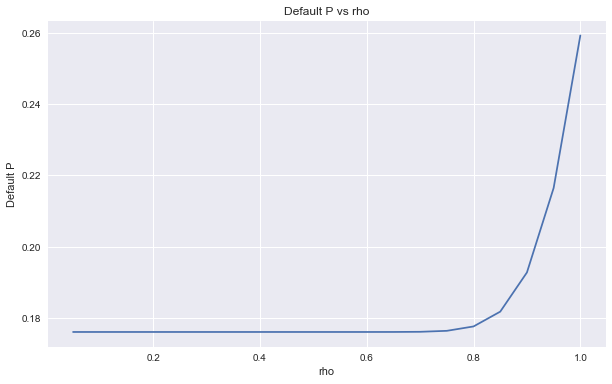

In [8]:
plt.figure(figsize=(10,6))
plt.title('Default P vs rho')
plt.plot(rho_list, defaultP_list)
plt.xlabel("rho")
plt.ylabel("Default P")
plt.show()

In [19]:
def simulate_V(V0, r, sigma, T, steps, N, K, D):
    h = T / steps
    dw = np.random.normal(
        0, np.sqrt(h), [N, steps])
    dV = r * h + sigma * dw
    c = np.ones([N])
    K_list = c * K
    D_list = c * D

    V = np.zeros([N, steps+1])
    V[:, 0] = V0
    for i in range(1, steps+1):
        V[:, i] = V[:, i-1] + V[:, i-1] * dV[:, i-1]
        c = (V[:, i] >= K_list) * c
        V[:, i] = V[:, i] * c
    c = (V[:, -1] >= D_list) * c
    V[:, -1] = V[:, -1] * c
    return V

In [20]:
N = 10000
steps = 10000
K1 = K1_list[-1]
res = simulate_V(V0, r, sigma, T, N, steps, K1, D)

In [21]:
sum(res[:,-1]==0)/N

0.258

In [22]:
N = 10000
steps = 10000
K2 = D * np.exp(-r*T) * 0.0001
res2 = simulate_V(V0, r, sigma, T, N, steps, K2, D)

In [23]:
sum(res2[:,-1]==0)/N

0.178

In [17]:
1 - get_survivalP(V0, D, r, sigma, T, K2)

0.1760941859222841

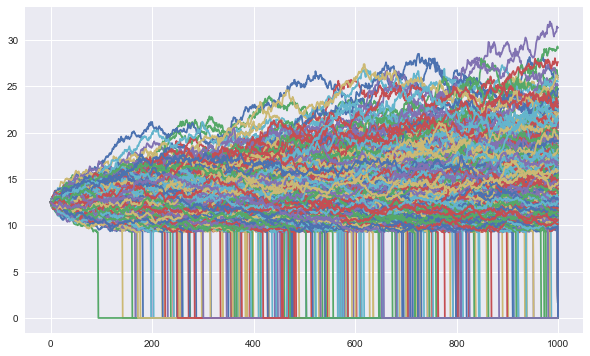

In [52]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame(res).T)

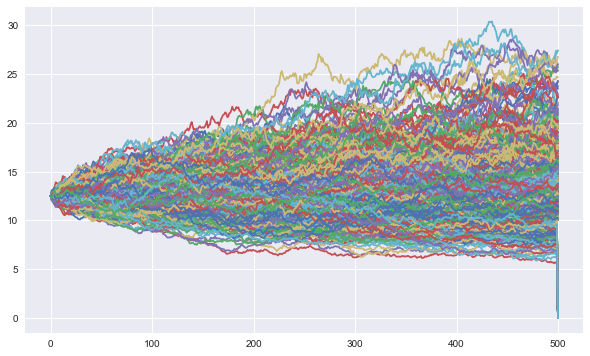

In [19]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame(res2).T)